In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('./data/fulldata.csv')

In [3]:
unemp = train[train['INDICATOR'] == "Unemployment"]
rgdp = train[train['INDICATOR'] == "RealGDP"]
cpce = train[train['INDICATOR'] == "Core PCE"]
ccpi = train[train['INDICATOR'] == "Core CPI"]
ngnp = train[train['INDICATOR'] == "NominalGNP"]
rgnp = train[train['INDICATOR'] == "RealGNP"]

In [4]:
np.random.seed(0)
def model_setup(df):
    
    rand = df.sample(frac = 1)
    #80/20 split
    nrow = len(rand)
    train_prop = int(np.round(nrow*0.8))
    train = rand[:train_prop]
    val = rand[train_prop:]

    #filling na with 0 bc they replaced 0s with na in the original R code but we should definitely look into this more
    train = train.fillna(0)
    val = val.fillna(0)

    X_train, Y_train = train[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], train[["actual"]]
    X_val, Y_val = val[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], val[["actual"]]
    
    return X_train, Y_train, X_val, Y_val

In [5]:
rgdp.sort_values(by=['YEAR FORECAST MADE'])

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,bin_value_sum,TDIST,actual,ACTUAL_BIN,MAX,NUM_OF_MAX,ACTUAL_CONF,HIT,pred_average,pred_var
5016,1992,1,1992,RealGDP,20,2.0,1992-20-1992-1,RealGDP-1992-20-1992-1,0.0,0.0,...,100.0,0.75,3.52244,4.0,0.50,2.0,0.00,0.0,1.00,0.2500
5224,1992,3,1993,RealGDP,415,1.0,1993-415-1992-3,RealGDP-1993-415-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.50,2.0,0.50,0.5,3.00,0.2500
5223,1992,3,1993,RealGDP,414,1.0,1993-414-1992-3,RealGDP-1993-414-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.60,1.0,0.60,1.0,2.40,0.3900
5222,1992,3,1993,RealGDP,413,2.0,1993-413-1992-3,RealGDP-1993-413-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.60,1.0,0.60,1.0,2.10,0.2400
5221,1992,3,1993,RealGDP,412,2.0,1993-412-1992-3,RealGDP-1993-412-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.45,1.0,0.45,1.0,1.75,2.7875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35492,2021,1,2023,RealGDP,546,1.0,2023-546-2021-1,RealGDP-2023-546-2021-1,NaN,NaN,...,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35491,2021,1,2023,RealGDP,535,1.0,2023-535-2021-1,RealGDP-2023-535-2021-1,0.0,0.0,...,100.0,2.75,NaN,NaN,0.60,1.0,NaN,NaN,2.35,0.5275
35490,2021,1,2023,RealGDP,528,1.0,2023-528-2021-1,RealGDP-2023-528-2021-1,0.0,0.0,...,100.0,2.75,NaN,NaN,0.50,1.0,NaN,NaN,1.70,0.7600
35488,2021,1,2023,RealGDP,518,2.0,2023-518-2021-1,RealGDP-2023-518-2021-1,0.0,0.0,...,100.0,2.75,NaN,NaN,0.50,1.0,NaN,NaN,2.30,0.7600


In [6]:
rgdp = rgdp[['YEAR BEING FORECAST',"MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF","actual"]]

In [7]:
df = rgdp.groupby(['YEAR BEING FORECAST']).mean()

In [8]:
df

,MAX,pred_average,pred_var,HIT,ACTUAL_CONF,actual
YEAR BEING FORECAST,,,,,,
1992,0.591291,1.872952,0.688754,0.034722,0.074528,3.52244
1993,0.558638,2.699792,0.846118,0.646898,0.468752,2.75285
1994,0.562312,3.160654,0.767345,0.034979,0.134457,4.02883
1995,0.567066,2.866563,0.773014,0.527778,0.388255,2.68428
1996,0.576023,2.318897,0.833771,0.076754,0.138845,3.77250
1997,0.568741,2.576589,0.797386,0.010490,0.057975,4.44722
1998,0.547826,2.651217,0.879192,0.019305,0.049417,4.48141
1999,0.540984,2.890070,0.844445,0.070000,0.139484,4.75324
2000,0.529019,3.485800,0.918175,0.173077,0.197404,4.12748


<Figure size 432x288 with 0 Axes>

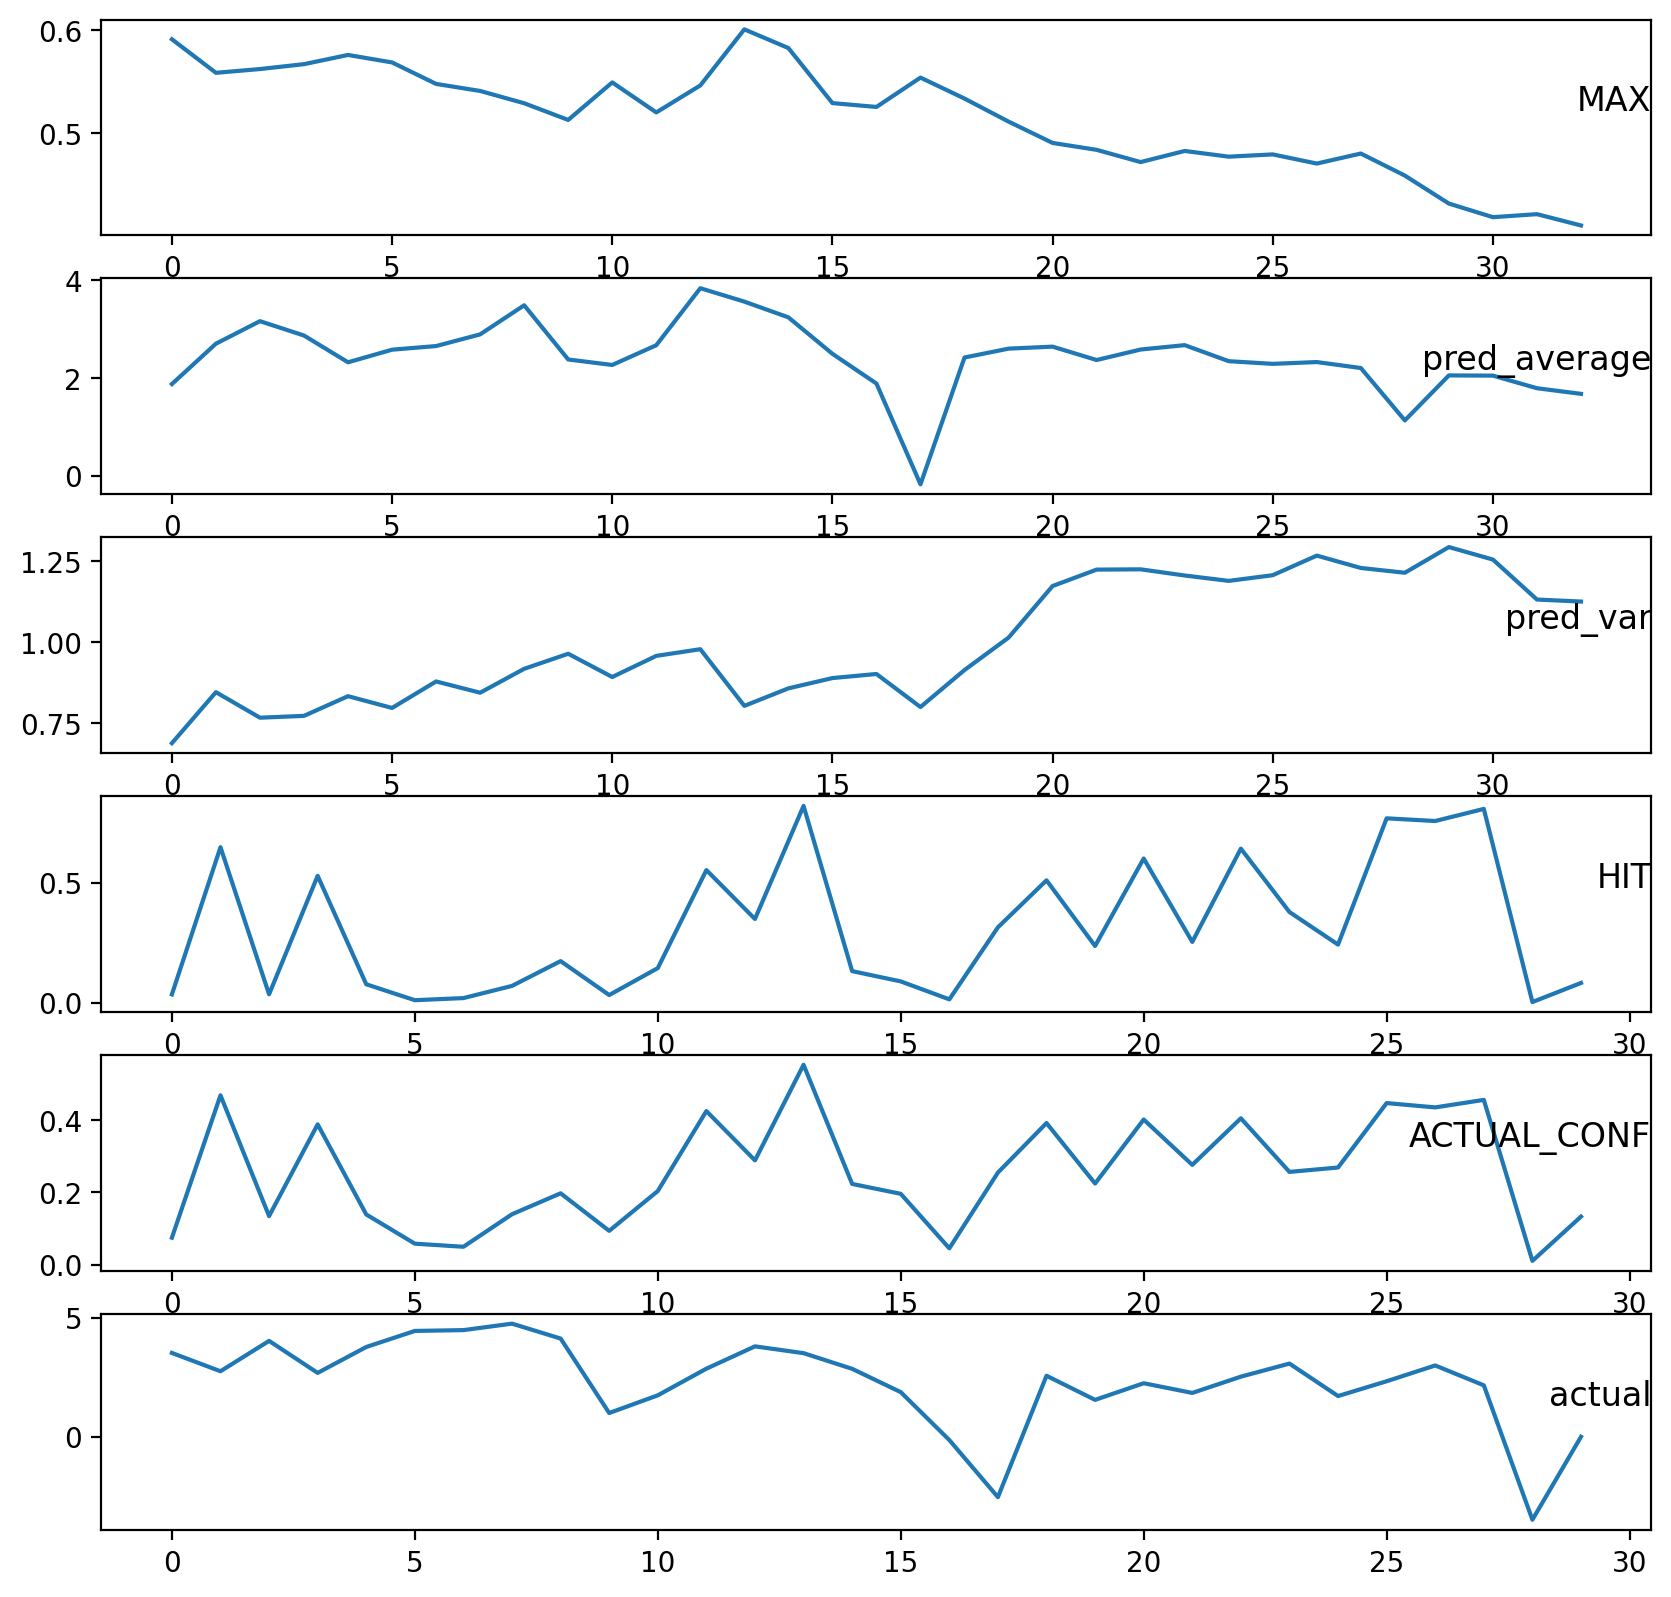

In [9]:
groups = [0, 1, 2, 3,4, 5]
i = 1
values = df.values
pyplot.figure()
figure(figsize=(10, 10), dpi=200)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1  
pyplot.show()

In [10]:
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
# ensure all data is float
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(values, 10, 1)

print(reframed)

    var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var6(t-10)  \
10    0.591291    1.872952    0.688754    0.034722    0.074528     3.52244   
11    0.558638    2.699792    0.846118    0.646898    0.468752     2.75285   
12    0.562312    3.160654    0.767345    0.034979    0.134457     4.02883   
13    0.567066    2.866563    0.773014    0.527778    0.388255     2.68428   
14    0.576023    2.318897    0.833771    0.076754    0.138845     3.77250   
15    0.568741    2.576589    0.797386    0.010490    0.057975     4.44722   
16    0.547826    2.651217    0.879192    0.019305    0.049417     4.48141   
17    0.540984    2.890070    0.844445    0.070000    0.139484     4.75324   
18    0.529019    3.485800    0.918175    0.173077    0.197404     4.12748   
19    0.512766    2.376183    0.964634    0.031915    0.093468     0.99835   
20    0.549289    2.263849    0.892878    0.144037    0.203750     1.74170   
21    0.520083    2.668211    0.958045    0.551653    0.425083  

In [13]:
# split into train and test sets
values = reframed.values
train_num = 20
train = values[:train_num, :]
test = values[train_num:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20, 1, 65) (20,) (0, 1, 65) (0,)


In [16]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(values, 10, 1)

# split into train and test sets
values = reframed.values
train_num = 20
train = values[:train_num, :]
test = values[train_num:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dense(8))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')
# fit network
model1.fit(train_X, train_y, 
                    epochs=800, 
                    batch_size=32, 
                    validation_data=(test_X, test_y), 
                    verbose=2, 
                    shuffle=False)


Epoch 1/800
1/1 - 0s - loss: 6.7431
Epoch 2/800
1/1 - 0s - loss: 6.0765
Epoch 3/800
1/1 - 0s - loss: 5.4891
Epoch 4/800
1/1 - 0s - loss: 4.9782
Epoch 5/800
1/1 - 0s - loss: 4.5416
Epoch 6/800
1/1 - 0s - loss: 4.1768
Epoch 7/800
1/1 - 0s - loss: 3.8810
Epoch 8/800
1/1 - 0s - loss: 3.6506
Epoch 9/800
1/1 - 0s - loss: 3.4812
Epoch 10/800
1/1 - 0s - loss: 3.3672
Epoch 11/800
1/1 - 0s - loss: 3.3012
Epoch 12/800
1/1 - 0s - loss: 3.2737
Epoch 13/800
1/1 - 0s - loss: 3.2733
Epoch 14/800
1/1 - 0s - loss: 3.2875
Epoch 15/800
1/1 - 0s - loss: 3.3038
Epoch 16/800
1/1 - 0s - loss: 3.3123
Epoch 17/800
1/1 - 0s - loss: 3.3061
Epoch 18/800
1/1 - 0s - loss: 3.2826
Epoch 19/800
1/1 - 0s - loss: 3.2421
Epoch 20/800
1/1 - 0s - loss: 3.1877
Epoch 21/800
1/1 - 0s - loss: 3.1237
Epoch 22/800
1/1 - 0s - loss: 3.0549
Epoch 23/800
1/1 - 0s - loss: 2.9861
Epoch 24/800
1/1 - 0s - loss: 2.9212
Epoch 25/800
1/1 - 0s - loss: 2.8629
Epoch 26/800
1/1 - 0s - loss: 2.8130
Epoch 27/800
1/1 - 0s - loss: 2.7719
Epoch 28/8

Epoch 213/800
1/1 - 0s - loss: 7.9213e-08
Epoch 214/800
1/1 - 0s - loss: 8.0210e-08
Epoch 215/800
1/1 - 0s - loss: 9.1822e-08
Epoch 216/800
1/1 - 0s - loss: 1.0619e-07
Epoch 217/800
1/1 - 0s - loss: 1.2476e-07
Epoch 218/800
1/1 - 0s - loss: 1.4288e-07
Epoch 219/800
1/1 - 0s - loss: 1.6070e-07
Epoch 220/800
1/1 - 0s - loss: 1.7669e-07
Epoch 221/800
1/1 - 0s - loss: 1.8993e-07
Epoch 222/800
1/1 - 0s - loss: 2.0103e-07
Epoch 223/800
1/1 - 0s - loss: 2.0839e-07
Epoch 224/800
1/1 - 0s - loss: 2.1385e-07
Epoch 225/800
1/1 - 0s - loss: 2.1575e-07
Epoch 226/800
1/1 - 0s - loss: 2.1547e-07
Epoch 227/800
1/1 - 0s - loss: 2.1256e-07
Epoch 228/800
1/1 - 0s - loss: 2.0744e-07
Epoch 229/800
1/1 - 0s - loss: 2.0040e-07
Epoch 230/800
1/1 - 0s - loss: 1.9165e-07
Epoch 231/800
1/1 - 0s - loss: 1.8170e-07
Epoch 232/800
1/1 - 0s - loss: 1.7020e-07
Epoch 233/800
1/1 - 0s - loss: 1.5833e-07
Epoch 234/800
1/1 - 0s - loss: 1.4570e-07
Epoch 235/800
1/1 - 0s - loss: 1.3315e-07
Epoch 236/800
1/1 - 0s - loss: 1.2

1/1 - 0s - loss: 5.6777e-14
Epoch 409/800
1/1 - 0s - loss: 4.7539e-14
Epoch 410/800
1/1 - 0s - loss: 3.4916e-14
Epoch 411/800
1/1 - 0s - loss: 3.3696e-14
Epoch 412/800
1/1 - 0s - loss: 1.8039e-14
Epoch 413/800
1/1 - 0s - loss: 6.2529e-14
Epoch 414/800
1/1 - 0s - loss: 4.7784e-14
Epoch 415/800
1/1 - 0s - loss: 3.7041e-14
Epoch 416/800
1/1 - 0s - loss: 3.0890e-14
Epoch 417/800
1/1 - 0s - loss: 6.4251e-14
Epoch 418/800
1/1 - 0s - loss: 4.1059e-14
Epoch 419/800
1/1 - 0s - loss: 3.7652e-14
Epoch 420/800
1/1 - 0s - loss: 4.1367e-14
Epoch 421/800
1/1 - 0s - loss: 2.0265e-14
Epoch 422/800
1/1 - 0s - loss: 2.4051e-14
Epoch 423/800
1/1 - 0s - loss: 1.9900e-14
Epoch 424/800
1/1 - 0s - loss: 3.0775e-14
Epoch 425/800
1/1 - 0s - loss: 3.5546e-14
Epoch 426/800
1/1 - 0s - loss: 1.3581e-14
Epoch 427/800
1/1 - 0s - loss: 1.3015e-14
Epoch 428/800
1/1 - 0s - loss: 1.3459e-14
Epoch 429/800
1/1 - 0s - loss: 2.0302e-14
Epoch 430/800
1/1 - 0s - loss: 2.8118e-14
Epoch 431/800
1/1 - 0s - loss: 1.9665e-14
Epoch 

Epoch 604/800
1/1 - 0s - loss: 1.5586e-14
Epoch 605/800
1/1 - 0s - loss: 1.0120e-14
Epoch 606/800
1/1 - 0s - loss: 1.0815e-14
Epoch 607/800
1/1 - 0s - loss: 1.3557e-14
Epoch 608/800
1/1 - 0s - loss: 1.1059e-14
Epoch 609/800
1/1 - 0s - loss: 2.3163e-14
Epoch 610/800
1/1 - 0s - loss: 2.2651e-14
Epoch 611/800
1/1 - 0s - loss: 1.0722e-14
Epoch 612/800
1/1 - 0s - loss: 1.2131e-14
Epoch 613/800
1/1 - 0s - loss: 1.0261e-14
Epoch 614/800
1/1 - 0s - loss: 1.9454e-14
Epoch 615/800
1/1 - 0s - loss: 1.7667e-14
Epoch 616/800
1/1 - 0s - loss: 1.6608e-14
Epoch 617/800
1/1 - 0s - loss: 4.6390e-14
Epoch 618/800
1/1 - 0s - loss: 2.8963e-14
Epoch 619/800
1/1 - 0s - loss: 2.8337e-14
Epoch 620/800
1/1 - 0s - loss: 1.2850e-14
Epoch 621/800
1/1 - 0s - loss: 2.3614e-14
Epoch 622/800
1/1 - 0s - loss: 2.1120e-14
Epoch 623/800
1/1 - 0s - loss: 3.2673e-14
Epoch 624/800
1/1 - 0s - loss: 2.6556e-14
Epoch 625/800
1/1 - 0s - loss: 2.3430e-14
Epoch 626/800
1/1 - 0s - loss: 1.3849e-14
Epoch 627/800
1/1 - 0s - loss: 1.9

1/1 - 0s - loss: 2.4042e-14
Epoch 800/800
1/1 - 0s - loss: 3.0831e-14


In [17]:
values = values[:, :-1]
values = values.reshape((values.shape[0], 1, values.shape[1]))
full_data = model1.predict(values)

In [18]:
values = values.reshape((values.shape[0], values.shape[2]))
print('Test MSE: ' + str(mean_squared_error(full_data, values[:, -1])))

Test MSE: 4.9545584
